In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3960 images belonging to 7 classes.
Found 1320 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 3960,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 1320)

Epoch 1/100
123/123 [==============================] - 1666s 14s/step - loss: 1.8975 - acc: 0.2580 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7336 - val_acc: 0.3042 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
123/123 [==============================] - 1670s 14s/step - loss: 1.7140 - acc: 0.3191 - precision: 0.4906 - recall: 0.0716 - val_loss: 1.5569 - val_acc: 0.3510 - val_precision: 0.6223 - val_recall: 0.1023
Epoch 3/100
123/123 [==============================] - 1672s 14s/step - loss: 1.6481 - acc: 0.3218 - precision: 0.5623 - recall: 0.1017 - val_loss: 1.5345 - val_acc: 0.3741 - val_precision: 0.5933 - val_recall: 0.0499
Epoch 4/100
123/123 [==============================] - 1669s 14s/step - loss: 1.6069 - acc: 0.3444 - precision: 0.5926 - recall: 0.1275 - val_loss: 1.4606 - val_acc: 0.3865 - val_precision: 0.6224 - val_recall: 0.1804
Epoch 5/100
123/123 [==============================] - 1677s 14s/step - loss: 1.5628 - acc: 0.3683 - precision: 

123/123 [==============================] - 1677s 14s/step - loss: 0.7954 - acc: 0.6961 - precision: 0.7659 - recall: 0.6143 - val_loss: 0.4872 - val_acc: 0.8220 - val_precision: 0.8513 - val_recall: 0.7756
Epoch 39/100
123/123 [==============================] - 1670s 14s/step - loss: 0.7701 - acc: 0.7051 - precision: 0.7691 - recall: 0.6306 - val_loss: 0.5657 - val_acc: 0.7870 - val_precision: 0.8198 - val_recall: 0.7537
Epoch 40/100
123/123 [==============================] - 1675s 14s/step - loss: 0.7414 - acc: 0.7225 - precision: 0.7898 - recall: 0.6542 - val_loss: 0.5262 - val_acc: 0.8136 - val_precision: 0.8371 - val_recall: 0.7818
Epoch 41/100
123/123 [==============================] - 1679s 14s/step - loss: 0.7378 - acc: 0.7261 - precision: 0.7846 - recall: 0.6552 - val_loss: 0.5114 - val_acc: 0.8157 - val_precision: 0.8440 - val_recall: 0.7838
Epoch 42/100
123/123 [==============================] - 1673s 14s/step - loss: 0.7470 - acc: 0.7264 - precision: 0.7838 - recall: 0.6498 

123/123 [==============================] - 1689s 14s/step - loss: 0.4308 - acc: 0.8479 - precision: 0.8693 - recall: 0.8258 - val_loss: 0.1320 - val_acc: 0.9652 - val_precision: 0.9709 - val_recall: 0.9621
Epoch 76/100
123/123 [==============================] - 1692s 14s/step - loss: 0.4168 - acc: 0.8540 - precision: 0.8809 - recall: 0.8314 - val_loss: 0.2131 - val_acc: 0.9368 - val_precision: 0.9438 - val_recall: 0.9331
Epoch 77/100
123/123 [==============================] - 1685s 14s/step - loss: 0.4271 - acc: 0.8497 - precision: 0.8756 - recall: 0.8263 - val_loss: 0.1846 - val_acc: 0.9447 - val_precision: 0.9480 - val_recall: 0.9372
Epoch 78/100
123/123 [==============================] - 1686s 14s/step - loss: 0.3865 - acc: 0.8695 - precision: 0.8881 - recall: 0.8492 - val_loss: 0.1598 - val_acc: 0.9476 - val_precision: 0.9548 - val_recall: 0.9468
Epoch 79/100
123/123 [==============================] - 1687s 14s/step - loss: 0.3946 - acc: 0.8685 - precision: 0.8852 - recall: 0.8460 

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.13      0.13      0.13       165
    disgust       0.09      0.08      0.09       165
    fearful       0.13      0.13      0.13       165
      happy       0.12      0.12      0.12       165
    neutral       0.23      0.24      0.24       330
        sad       0.16      0.16      0.16       165
  surprised       0.12      0.12      0.12       165

avg / total       0.15      0.15      0.15      1320



Confusion matrix, without normalization
[[22 21 18 21 43 21 19]
 [11 14 23 27 52 17 21]
 [23 26 22 17 41 18 18]
 [28 18 19 20 41 16 23]
 [43 38 40 46 79 45 39]
 [23 16 17 17 43 26 23]
 [16 28 24 22 38 17 20]]


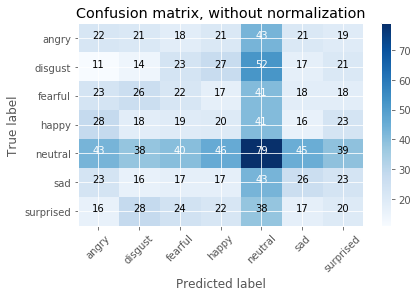

Normalized confusion matrix
[[13.3333 12.7273 10.9091 12.7273 26.0606 12.7273 11.5152]
 [ 6.6667  8.4848 13.9394 16.3636 31.5152 10.303  12.7273]
 [13.9394 15.7576 13.3333 10.303  24.8485 10.9091 10.9091]
 [16.9697 10.9091 11.5152 12.1212 24.8485  9.697  13.9394]
 [13.0303 11.5152 12.1212 13.9394 23.9394 13.6364 11.8182]
 [13.9394  9.697  10.303  10.303  26.0606 15.7576 13.9394]
 [ 9.697  16.9697 14.5455 13.3333 23.0303 10.303  12.1212]]


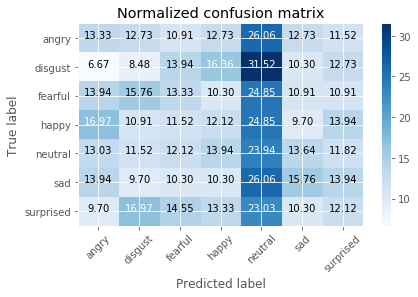

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

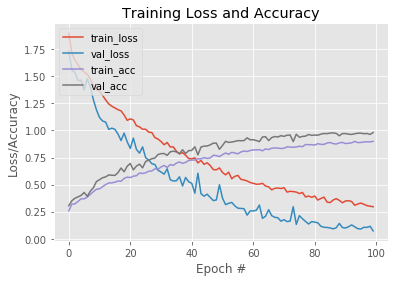

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")